# Ensemble Learning and Random Forests

* Finding  aggregated answer , called `wisdom of the crowd`.

* A group of predictors is called an ensemble.

* Train a group of decision tree classifiers, each on a different random subset of the training set, obtain the predictions of all the individual trees, and the class that gets the most votes is the ensemble's prediction.And ensemble of decision trees known as `random forest`.

## Voting Classifiers


*Train different models with same data set and choose one predicts more (achieving high accuracy). This majority-vote classifier is called a `hard voting classifier`.

* different models likely to make same kind of erros, as they are using same set of training data.So, there will be many majority votes for the wrong class, reducing the ensemble's accuracy.

* Ensemble methods works best when predictors are as independent from one another as possible.
one way - Train them using different algorithms. This increase the chance of making different kind of errors, improving the ansemble accuracy.

Scikit-learn provides a `VotingClassifier` class, just give the list of name/predictors pairs, and use it like a normal classifier.

In below code using moons dataset and then will create and train a voting classifier composed of three diverse classifiers.

In [ ]:
                                                                                                                                                                                                                                                                  import sys

assert sys.version_info >= (3, 7)

It also require Scikit-Learn $\geq$ 1.0.1:

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

defining default font size

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


Creating a image folder to save all plots

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() /"images"/"ensemble"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path=IMAGES_PATH /f"{fig_id}.{fig_extension}"
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi= resolution)


## Voting Classifiers

In [ ]:
import numpy as np
np.random.rand(10000,10) <0.51

array([[ True, False,  True, ..., False,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ..., False, False,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ..., False,  True, False],
       [ True,  True,  True, ...,  True, False, False]])

In [ ]:
np.arange(1, 10001)

array([    1,     2,     3, ...,  9998,  9999, 10000])

cumulative_heads 
 [[   1    0    0 ...    0    0    0]
 [   2    0    0 ...    0    1    1]
 [   2    1    1 ...    0    1    2]
 ...
 [5113 5114 5067 ... 5094 5106 5100]
 [5113 5114 5068 ... 5095 5107 5101]
 [5113 5115 5068 ... 5095 5108 5102]]
cumulative_heads_ratio 
 [[1.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.         0.         ... 0.         0.5        0.5       ]
 [0.66666667 0.33333333 0.33333333 ... 0.         0.33333333 0.66666667]
 ...
 [0.51140228 0.5115023  0.50680136 ... 0.5095019  0.51070214 0.51010202]
 [0.51135114 0.51145115 0.50685069 ... 0.50955096 0.51075108 0.51015102]
 [0.5113     0.5115     0.5068     ... 0.5095     0.5108     0.5102    ]]


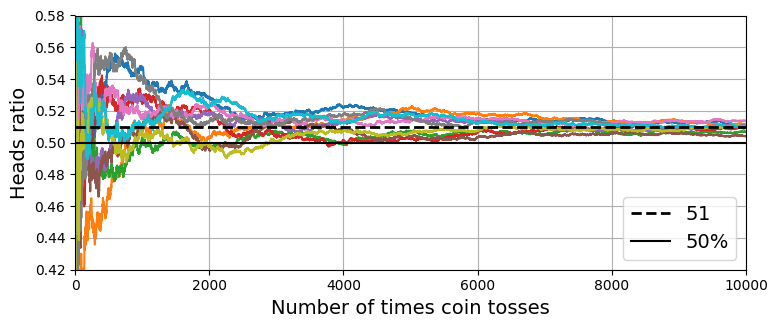

In [ ]:
import matplotlib.pyplot as plt

import numpy as np

heads_proba= 0.51
np.random.seed(42)

coin_tosses=(np.random.rand(10000,10) < heads_proba).astype(np.int32)
cumulative_heads = coin_tosses.cumsum(axis=0)
print("cumulative_heads \n",cumulative_heads)
cumulative_heads_ratio= cumulative_heads / np.arange(1, 10001).reshape(-1,1)
print("cumulative_heads_ratio \n",cumulative_heads_ratio)

plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0,10000],[0.51,0.51],"k--", linewidth=2, label="$51%$")
plt.plot([0,10000],[0.5,0.5], "k-", label="50%")
plt.xlabel("Number of times coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0,10000, 0.42,0.58])
plt.grid()
save_fig("law_of_large_numbers_plot")
plt.show()

Build a voting classifier:

* `VotingClassifier` clones every estimator and fit the clones.

* The original estimators are available via the `estimators` attribute.

* In place of list can use dict as well using `named_estimators` or `named_estimators_`

In [ ]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X,y=make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train,y_test= train_test_split(X, y, random_state=42)

voting_clf= VotingClassifier(
    estimators=[
        ('lr',LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc',SVC(random_state=42))
    ]
)

voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [ ]:
for name, clf in voting_clf.named_estimators_.items():
  print(name,"=", clf.score(X_test, y_test))

lr = 0.864
rf = 0.896
svc = 0.896


When calling the voting classifier's `predict()` method, it performs hard voting.

For example: the voting classifier predict class 1 for the first instance of the test set, because two out of 3 classifiers predict that class.

In [ ]:
voting_clf.predict(X_test[:1])

array([1])

In [ ]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_] # prediction by 3 different models

[array([1]), array([1]), array([0])]

In [ ]:
voting_clf.score(X_test, y_test)

0.912

voting classifier score more than all other individual classifiers.

If classifiers are able to estimate class probabilities (they all have a `predict_proba()`) then we can tell scikit-learn to predict the class with the highest class probabilty, averaged over all the individual classifiers. This is called *soft voting*. as soft voting average over all classifier it gives more weightage to highly confident vote, to use soft voting , while using voting classifier , set hyperparameter `voting="soft"`, and ensure that all classifiers can estimate class probabilities. This is not a case for `SVC` by default, so we need to set its `probability` to `True` (this will make `SVC` class use cross-validation to estimate class probabilities, slowing down training, and it will add a predict_proba() method)

Now using soft voting and this also improve the score further, just need to define estimator of SVC probability to True.

In [ ]:
voting_clf.voting="soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.92

## Bagging and Pasting

* One way to get diverse set of classifier is to use very different training algorithms (as discussed above).

* Another approach is to use the same training algorithm for every predictors but train them on different random subsets of the training set.

* When sampling is performed with replacement (like picking a card randomly from a deck of card, writing it down, and remove that card before picking the next card: the same card could not be sampled multiple times). This method is called *bagging*. *Pasting*: (like picking a card randomly from a deck of card, writing it down, then placing it back in the deck before picking the next card: the same card could be sampled multiple times).

* Both bagging and pasting allow training instances to be sampled several times across multiple predictors, but only bagging allows training instances to be sampled several times for the same predictor.


* Once all predictors are trained , the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors. The aggregation function is typically the **statistical mode for classification** (i.e., most frequent prediction , just like with a hard voting classifier), **or the average for regression**

* Each individual predictor has a higher bias then if it were trained on the original training set, but aggregation reduces both bias and varianece.

* Generally the net result is that the ensemble has a similar bias but lower variance then a single predictor trained on the original training set.

* They scale very well, as predictors can all be trained in parallel, via different CPU cores or even different servers. Similarly predictions can be made in parallel.

* Bag classifier automatically performs soft voting instead of hard voting if the base classifier can estimate class probabilities.(`predict_proba()`)

## Bagging and Pasting in Scikit-Learn
`BaggingClassifier` class (or `BaggingRegressor` for regression).

Below example is for `Bagging` and to use `Pasting` just need to set `bootstrap=False`. The n_jobs parameter tells Scikit-Learn the number of CPU ores to use for training and predictions, and `-1` tells to use allavailable CPU cores.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
'''
DecisionTreeClassifier(): This is the base estimator

n_estimators : this specifies the number of base estimators(decision trees) to combine in the ensemble.

max_samples: This specifies the maximum number of samples to draw from the training data for each base estimator.

n_jobs: Number of CPU cores to use for parallel processing, -1 means all CPU

random_state: This sets the random seed for reproducibility.
'''
bag_clf=BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, n_jobs=-1, random_state=42)

bag_clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
for idx in (0,1):
  print(idx)

0
1


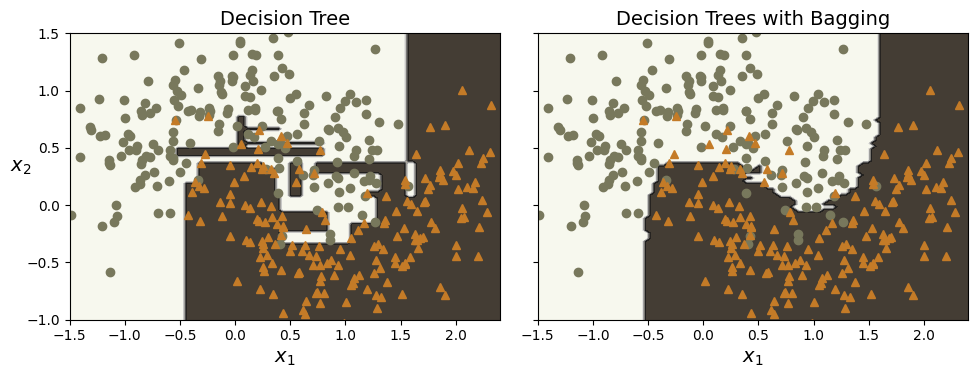

In [ ]:
def plot_decision_boundary(clf, X,y, alpha=1.0):
  axes=[-1.5,2.4,-1,1.5]
  x1, x2= np.meshgrid(np.linspace(axes[0], axes[1],100), np.linspace(axes[2], axes[3], 100))
  X_new= np.c_[x1.ravel(), x2.ravel()]
  y_pred= clf.predict(X_new).reshape(x1.shape)

  plt.contourf(x1, x2, y_pred, alpha=0.3 *alpha, cmap='Wistia')
  plt.contourf(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
  colors=["#78785c", "#c47b27"]
  markers= ("o","^")
  for idx in (0,1):
    plt.plot(X[:,0][y == idx], X[:,1][y == idx], color=colors[idx], marker=markers[idx], linestyle='none')
  plt.axis(axes)
  plt.xlabel(r"$x_1$")
  plt.ylabel(r"$x_2$", rotation=0)

tree_clf=DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

fig, axes= plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")

plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Decision Trees with Bagging")
plt.ylabel("")
save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

In above plot, ensemble has a comparable bias but a smaller variance (it makes roughly same number of error  as individual decision tree model) but it is able to generalize the model and decision boundary is less irregular.

* Bagging introduces a bit more diversity in a subset that each predictor is trained on, so bagging ends up slightly higher bias then pasting, but extra diversity means that the predictors end up being less correlated, so the ensemble's variance is reduced. Overall, bagging often results in better models, which explains why it's generally preferred.

With good CPU power, evaluating both bagging and pasting by cross-validation is worth to check.

## Out-Of-Bag evalution

With bagging some training sample instance may be sampled several times for any given predictor, while others may not be sampled at all. by default `BaggingClassifier` samples m training instances with replacement (`bootstrap=True`) where m is the size of the training set. With this process it can be shown mathematically that only about 63% of the training instances are sampled on average for each predictors. The remaining 37% of the training instances that are not sampled are called **out-of-bag(OOB)** instances.NOTE: They are not 37% for all predictors.

A bagging ensemble can be evaluated using OOB instances, without the need for a separate validation set: indeed, if there are enough estimators, then each instance in the training set will likely be an OOB instance of several estimators, so these estimators can be used to make a fair ensemble prediction for that instance.
Once we have prediction for each instance, we an compute the ensemble's prediction accuracy(or any other matric)

in Scikit-Learn we can set `oob_score=True` when creating `BaggingClassifier` to request an automatic OOB evalution after training.

In [ ]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, oob_score=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.896

In [ ]:
bag_clf.oob_decision_function_[:3] # probability for the first 3

array([[0.32352941, 0.67647059],
       [0.3375    , 0.6625    ],
       [1.        , 0.        ]])

OOB decision function for each training instance is also available through the `oob_decision_function_` attribute.
For example:
OOB evaluation estimates that the first training instance has a 67.6% probability of belonging to the positive class and 32.4% probability of belonging to the negative class (in above code output).

In [ ]:
from sklearn.metrics import accuracy_score

y_pred=bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.92

If randomly draw one instance from a dataset of size $m$, each instance in the dataset has probability $\dfrac {1}{m}$ of getting picked, and therefore it has a probability $1-\dfrac{1}{m}$ of not getting picked. If we draw a m instances with replacement, all draws  are independent and therefore each instance has a probability $(1- \dfrac{1}{m})^m$ of not getting picked. Now the fact is $exp(x)$ is equal to the limit of $(1- \dfrac{1}{m})^m$ as $m$ approaches infinity. So if $m$ is large, the ratio of out-of-bag instances will be about $exp(-1) \approx 0.37$. So roughly 63%$ \ (1-0.37)$  will be sampled.

In [ ]:
print(1-(1-1/1000)**1000)
print(1-np.exp(-1))

0.6323045752290363
0.6321205588285577


## Random Pathes and Random Subspaces

The `BaggingClassifier` class supports sampling the features as well.

Sampling is controlled by two hyperparameters: `max_features` and `bootstrap_features`.They work the same way as `max_samples` and `bootstrap`, but for features sampling instead of instance sampling. Thus, each predictor will be trained on a random subset of the input features.

This is useful when dealing with high dimensional inputs , as it can consideably speed up training. Sampling both training instances and features is called the *random patches method*. Keeping all training instances (by setting `bootstrap=Fasle` and `max_samples=1.0`) but sampling features (by setting `bootstrap_features` to `True` and/or `max_features` to a value smaller than `1.0`)


Sampling features results in even more predictor diversity , treading a bit more bias for a lower variance.

## Random Forest

* Random Forest is an ensemble of decision trees, generally train via the bagging method (or sometime pasting), typically with `max_samples` set to the size of the training set. Instead of building a `BaggingClassifier` and passing it a `DecisionTreeClassifier`, can use the `RandomForestClassifier` class, which is more convenient and optimized for decision trees(similarly there is a `RandomForestRegressor` class for regression tasks.)

Below code trains a random forest classifier with 500 trees, each limited to maximum 16 leaf nodes, using all available CPU cores:


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf= RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)

rnd_clf.fit(X_train, y_train)
y_pred_rf= rnd_clf.predict(X_test)

A Random Forest is equivalent to a bag of decision trees.


When growing trees , in place of searching best feature when splitting a node, it searches the best feature among random subset of features.By , default it samples $\sqrt{n}$ features () where n is the total number of features.
The algorithm results in greater tree diversity, which trades a higher bias for a low variance. So overall it is better model.

In [ ]:
bag_clf= BaggingClassifier(DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
                           n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
bag_clf.fit(X_train, y_train)
y_pred_bag= bag_clf.predict(X_test)
np.all(y_pred_bag == y_pred_rf) # same predictions

True

## Extra-Trees

At each node in a random forest only a subset of features is considered for splitting. It is possible to make trees even more random by also using **random thresholds** for each feature rather than searching for the **best possible thresholds** (like regular decision trees do). For this simply set `splitter="random"` when creating a `DecisionTreeClassifier`. This technique trade more bias for a lower variance.

A forest of such extremely random trees is called an *extremely randomized trees* ensemble. This technique trades more bias for a lower variance. It also makes extra-trees classifiers much faster to train then regular random forests, because finding the **best possible threshold** for each feature at every node is one of the most time-consuming tasks of growing tree.


Can create an extra-tree classifier using Scikit-Learn's `ExtraTreesClassifier` class. Its APIs are identical to the `RandomForestClassifier` class, except `bootstrap` default to `False`, same for `ExtraTreesRegressor` class case.


NOTE: To check which one is better, should try `ExtraTreesClassifier` and `RandomForestClassifier` both and compare them using *cross-validation*

## Feature Importance.

* Random forest makes it easy to measure the relative importance of each feature. Scikit-Learn measures a feature's importance by looking at how much the tree nodes that use that feature reduce impurity on average, across all tree in the forest. It is a weightd average , where each node's weight is equal to the number of training samples that are associated with it.

Scikit-Learn computes this score automatically for each feature after training, then it scales the results so that the sum of all importance is equal to 1. Can access the result using the `feature_importances_` variable.

Below code trains a `RandomForestClassifier` on the iris dataset and output each feature's importance. it seems most important features are the petal lenght and width.

In [ ]:
from sklearn.datasets import load_iris

iris= load_iris(as_frame=True)

rnd_clf= RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)
for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
  print(round(score,2), name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


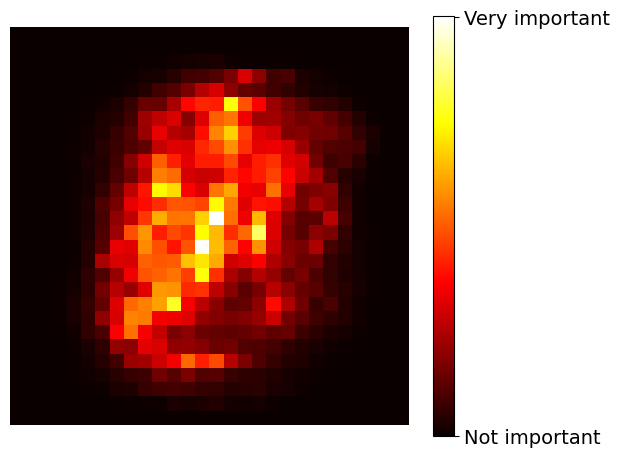

In [ ]:
from sklearn.datasets import fetch_openml

X_mnist, y_mnist= fetch_openml('mnist_784', return_X_y=True, parser='auto')

rnd_clf= RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_mnist, y_mnist)

heatmap_image =  rnd_clf.feature_importances_.reshape(28,28)
plt.imshow(heatmap_image, cmap="hot")

cbar=plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'], fontsize=14)
plt.axis("off")
save_fig("mnist_feature_importance_plot")
plt.show()

## NOTE: Random Forests are very handy to get a quick understanding of what features actually matter, in particular when need to perform feature selection.

## Boosting

* Originally called hypothesis boosting.

* Refers to any ansemble methods that can combine several weak learners into a strong learner.

* Train predictors sequentially , each trying to correct its predecessor.

* **AdaBoost** and **Gradient boosting** are boosting methods.


### AdaBoost

One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor underfit. This results in a new predictors fousing more and more on the hard cases. This is the technique used by AdaBoost.

Example:

When training a AdaBoost classifier, the algorithm first trains base classifier (such as decision tree) and uses it to make predictions on the training set. The algorithm then increases the relative weight of misclassified training instances. Then it trains a  second classifier, using the updated weights, and again makes predictions on the training set, updtaes the instance weights, and so on.

In below plot it shows decision boundaries of five consecutive predictors on the moon dataset (each predictor is highly regularized SVM classifier with a RBF kernel).
The first classifier gets many instances wrong , so their weights get boosted. The second classifier therefore does a better job on these instanes, and so on.

The plot on the right represent the same sequence of predictions , except that the learning rate is halved(i.e., the misclassified instance weights are boosted much less at every iteration).We can relate this sequential learning technique with gradient descent, except that instead of tweaking a single predictor's parameters to minimize a cost function, AdaBoost adds predictors to the ensemble , gradually making it better.

Once all predictors are trained, the ensemble makes predictions very much like bagging or pasting, except that predictors have different weights depending on their overall accuracy on the weighted training set.

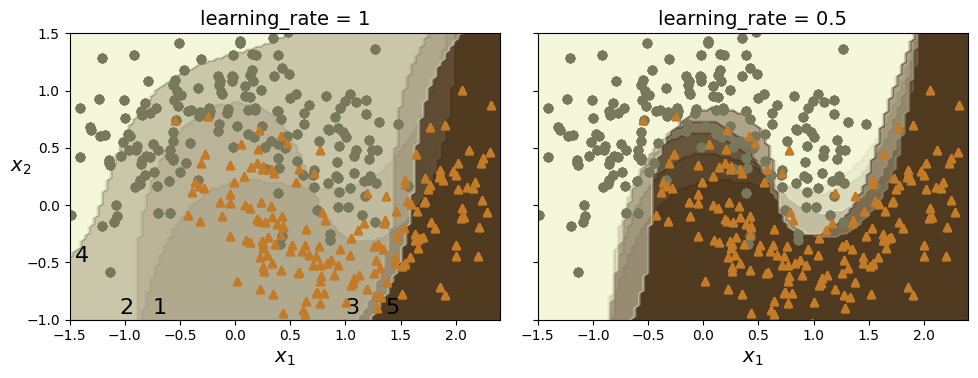

In [ ]:
m= len(X_train)

fig, axes= plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

for subplot, learning_rate in ((0, 1), (1, 0.5)):
  sample_weights= np.ones(m) /m
  plt.sca(axes[subplot])
  for i in range(5):
    svm_clf = SVC(C=0.2, gamma=0.6, random_state=42)
    svm_clf.fit(X_train, y_train, sample_weight=sample_weights * m)
    y_pred = svm_clf.predict(X_train)

    error_weights= sample_weights[y_pred != y_train].sum() # this is a single scalar value.
    #print("error_weights \n",error_weights)
    r= error_weights / sample_weights.sum()  #equation 7-a # this is a single scalar value.
    #print("r \n",r)
    alpha= learning_rate * np.log((1-r)/r) # equation 7-b # this is a single scalar value,predictor weight.
    #print("alpha",alpha)
    sample_weights[y_pred != y_train] *= np.exp(alpha) # equation 7-c
    sample_weights /=sample_weights.sum() #normalization step # adjusting sample weights to common scale, it is in vector form for all samples passed as training instances.
    #print("sample_weights \n",sample_weights)
    plot_decision_boundary(svm_clf, X_train, y_train, alpha=0.4)
  plt.title(f"learning_rate = {learning_rate}")

  if subplot==0 :
    plt.text(-0.75, -0.95, "1", fontsize=16)
    plt.text(-1.05, -0.95, "2", fontsize=16)
    plt.text(1.0, -0.95, "3", fontsize=16)
    plt.text(-1.45, -0.5, "4", fontsize=16)
    plt.text(1.36, -0.95, "5", fontsize=16)
  else:
    plt.ylabel("")

save_fig("boosting_plot")
plt.show()





One important drawback to this sequential learning technique:

* Training cannot be parallelized since each predictor can only be trained after the previous predictor has been trained and evaluated. So it doesn't scale same as bagging and pasting.

## **Under the hood of AdaBoost**

* Each instance weight $w^{(i)}$ is initially set to $\dfrac {1}{m}$. A first predictor is trained, and its weighted error rate $r_1$ is computed on the training set.


#### **Equation 7-a:  Weighted error rate of the $j^{th} predictor$**

$r_j= \underset { {i=i \\ \hat y_j^{(i)} \neq y^{(i)}} } \sum^{m} w^{(i)}$ , where $\hat y_j^{(i)}$ is the $j^{th}$ predictor's prediction.

The predictor's weight $\alpha_j$ is then computed using below equation 7-b.

#### ** Equation 7-b: Predictor weight**

$\alpha_j= \eta \ log \ \dfrac{(1-r_j)}{r_j}$

- where $\eta$ is the learning rate hyperparameter (defaults to 1) (Note: Original AdaBoost algorithm does not use learning rate hypperparameter ). The more accurate the predictor is , the higher its weight will be. In case it just weighting randomly then its weight will be close to zero.If it is most often wrong (i.e. less accurate then random guessing), then its weight will be negative.

Next, the AdaBoost algorithm updates the instance weights, using equation 7-c.

#### **Equation 7-c:  Weight update rule**

for $i=1,2,3,\cdots$

$w^i \leftarrow \begin{matrix} w^{(i)} & if \ \hat y_j ^{(i)} = y^{(i)} \\ w^{(i)} \ exp(\alpha_j) & if \ \hat y_j^{(i)} \neq y^{(i)}\end{matrix}$


Then all the instance weights are normalized (i.e, divide by $\sum_{i=1}^m w^{(i)}$  ).

Finally a new predictor is trained using a updated weights, and the whole process is repeated: the new predictor's weight is computed, then instance weights are updated, then another predictor is trained , and so on. The algoritm is stopped when the desire number of predictors is reached, or when a perfect predictor is found.

AdaBoost weight all predictors using $\alpha_j$

#### **Equation 7-d: AdaBoost predictions**

$\hat y(x)= \underset k {argmax} \underset {\underset {\hat y_j{(x)}=k}{j=1}}\sum^N {\alpha_j} $ , where $N$  is the number of predictors.

* Scikit-Learn uses Multiclass version of AdaBoost calles SAMME(Stagewise Additive Modeling using a Multiclass Exponential loss function).

If the predictors can estimate class probabilities (`predict_proba()`), Scikit-Learn can use a variant of SAMME called SAMME.R (the R stand for "Real"). which relies on class probabilities rather than predictions and generally performs better.




Below code trains an AdaBoost classifier based on 30 decision stumps using Scikit-Learn `AdaBoostClassifier` class (for regression there is `AdaBoostRegressor` class). A decision stump is a decision tree with `max_depth=1`- It means a tree composed of single decision node + two leaf nodes. This is the default base estimator for the `AdaBoostClassifier` class.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf= AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=30,
    learning_rate=0.5, random_state=42
)

ada_clf.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

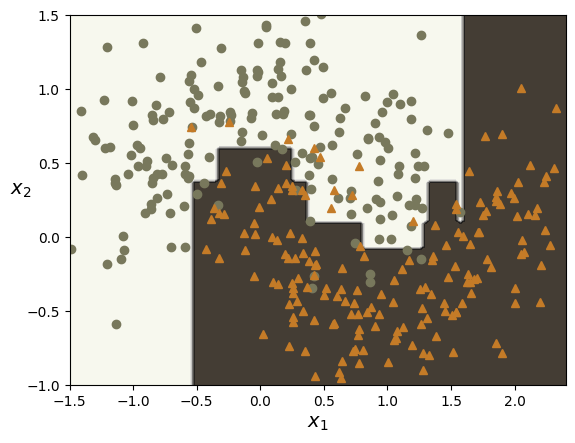

In [ ]:
plot_decision_boundary(ada_clf, X_train, y_train)

In case AdaBoost is overfitting the training set, we can try reducing the number of estimators or more strongly regularizing the base estimator.

## **Gradient Boosting**

It also works by sequentially adding predictors to an ensemble , eah one correcting its predecessor. However, instead of tweaking the instance weights at every iteration like AdaBoostt does, this methid tries to fit the new predictor to the residual error made by the previous predictor.

In below Example:

using simple regression , using decision trees as the base predictors: this is called gradient tree boosting, or gradient boosted regression trees (GBRT).

create and fit noisy quadratic dataset to `DecisionTreeRegressor`

In [ ]:
import numpy as np

from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)

X=np.random.rand(100,1) - 0.5
y= 3 * X[:,0]**2 +0.05 * np.random.randn(100) # y=3x^2 + Gaussian noise

tree_reg1= DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

Now, Training another decision tree regressor on the residual errors made by the previous predictor

In [ ]:
y2=y - tree_reg1.predict(X)
tree_reg2= DecisionTreeRegressor(max_depth=2, random_state=43)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2, random_state=43)

In [ ]:
y3= y2 - tree_reg2.predict(X)
tree_reg3= DecisionTreeRegressor(max_depth=2, random_state=44)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=2, random_state=44)

In [ ]:
x1= np.linspace(-0.5,0.5,500)
x1.reshape(-1,1)
x1.shape

(500,)

In below plot, left one is for indidual decisionTreeRegressor trained with error output from previous decisontreeregressor model, on the right hand side it is combining tree_reg , tree_reg + tree_reg2, tree_reg+ tree_reg2 +tree_reg3

Note: Y value has changed based on error found from previous model and passed that to subsequent model with all training data.

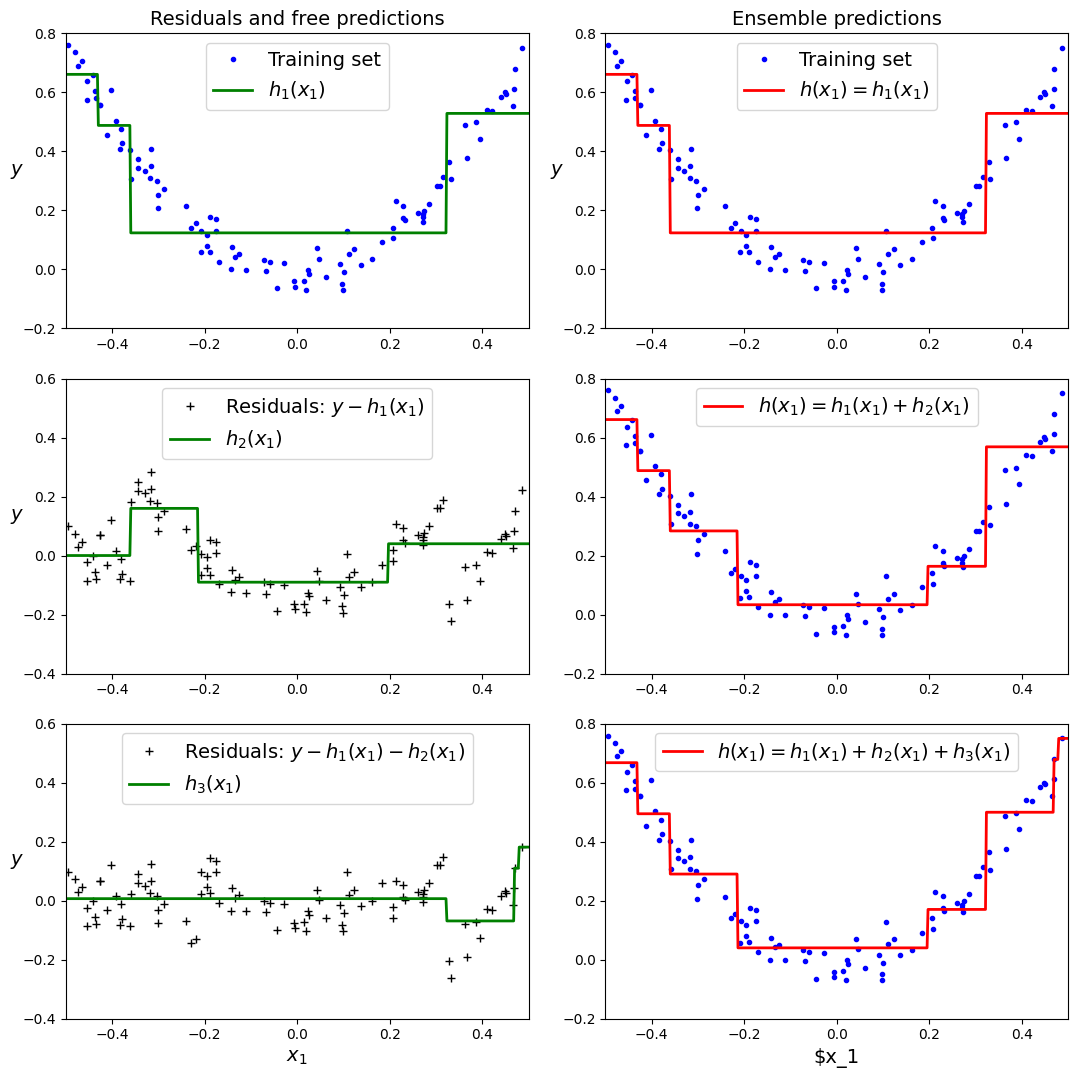

In [ ]:
def plot_predictions(regressors, X, y, axes, style, label=None, data_style="b.", data_label=None):
  x1= np.linspace(axes[0], axes[1],500)
  y_pred = sum(regressor.predict(x1.reshape(-1,1)) for regressor in regressors) # it creates 2D array with one column and a variable number of rows. The -1 in the
  #reshape function tells Python to automatically calulate the number of rows based on the original array's size.
  # in above line, it is predecting each x1 one by one and then sum that

  plt.plot(X[:,0], y, data_style, label=data_label)
  plt.plot(x1,y_pred , style, linewidth=2, label=label)
  if label or data_label:
    plt.legend(loc="upper center")
  plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(3,2,1) # 3 rows, 2 columns , index position 1
plot_predictions([tree_reg1], X,y, axes=[-0.5,0.5,-0.2,0.8], style="g-", label="$h_1(x_1)$",
                 data_label="Training set")
plt.ylabel("$y$", rotation=0)
plt.title("Residuals and free predictions")

plt.subplot(3,2,2)
plot_predictions([tree_reg1], X,y, axes=[-0.5,0.5,-0.2,0.8], style="r-", label="$h(x_1)=h_1(x_1)$",
                 data_label="Training set")
plt.ylabel("$y$", rotation=0)
plt.title("Ensemble predictions")

plt.subplot(3,2,3)
plot_predictions([tree_reg2], X,y2, axes=[-0.5,0.5,-0.4,0.6], style="g-", label="$h_2(x_1)$", data_style="k+",
                 data_label="Residuals: $y - h_1(x_1)$")
plt.ylabel("$y$", rotation=0)

plt.subplot(3,2,4)
plot_predictions([tree_reg1, tree_reg2], X,y, axes=[-0.5,0.5,-0.2,0.8], style="r-", label="$h(x_1)=h_1(x_1)+h_2(x_1)$")

plt.subplot(3,2,5)
plot_predictions([tree_reg3], X,y3, axes=[-0.5,0.5,-0.4,0.6], style="g-", label="$h_3(x_1)$", data_style="k+",
                 data_label="Residuals: $y - h_1(x_1) - h_2(x_1)$")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

plt.subplot(3,2,6)

plot_predictions([tree_reg1, tree_reg2,tree_reg3], X,y, axes=[-0.5,0.5,-0.2,0.8], style="r-", label="$h(x_1)=h_1(x_1)+h_2(x_1)+h_3(x_1)$")

plt.xlabel("$x_1")

save_fig("gradient_boosting_plot")
plt.show()


In Scikit-Learn `GradientBoostingRegressor` class to train GBRT ensemble more easily (there is also a `GredientBoostingClassifier` class for classification). It has hyperparameters to contol growth of decision trees (`max_depth`, `min_sample_leaf`), as well as hyperparameters to control the ensemble training , such as the number of trees(`n_estimators`).

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt= GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)

gbrt.fit(X,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [ ]:
gbrt_best= GradientBoostingRegressor(max_depth=2, learning_rate=0.05, n_estimators=500, n_iter_no_change=10, random_state=42)
gbrt_best.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

`learning_rate` hyperparameter scales the contribution of each tree, when set low to learning rate `0.5`, this needs more trees in the ensemble to fit the training set, but the predictions will usually generalize better. This is a regularization technique called *shrinkage*.

In [ ]:
gbrt_best.n_estimators_

92

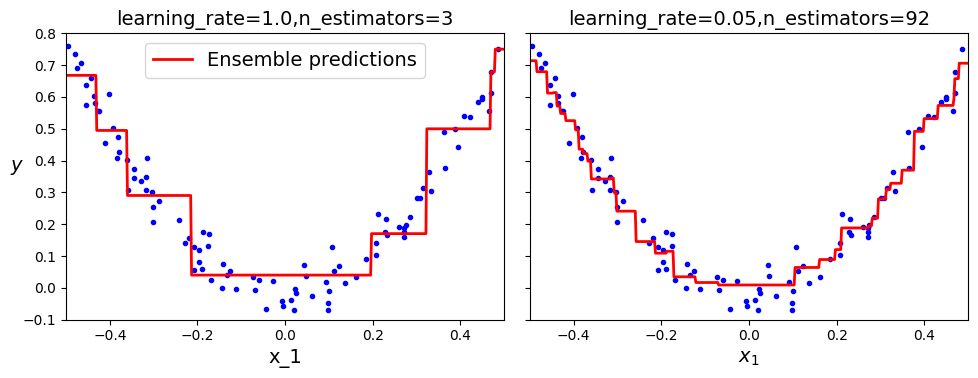

In [ ]:
fig, axes= plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X,y, axes=[-0.5,0.5,-0.1,0.8], style="r-", label="Ensemble predictions")
plt.title(f"learning_rate={gbrt.learning_rate},"
f"n_estimators={gbrt.n_estimators_}")
plt.xlabel("x_1")
plt.ylabel("$y$", rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_best],X,y,axes=[-0.5,0.5,-0.1,0.8], style="r-")
plt.title(f"learning_rate={gbrt_best.learning_rate}," f"n_estimators={gbrt_best.n_estimators_}")
plt.xlabel("$x_1$")
save_fig("gbrt_learning_rate_plot")
plt.show()

To find the optimal number of trees, we can perform cross-validation using `GridSearchCV` or `RandomizedSearchCV`, but there is a simple way: if we set the `n_iter_no_change` hyperparameter to an integer value , say 10,, then the `GradientBoostingRegressor` will automatically stop adding more trees during training if it sees that the last 10 trees didn't help. This is simply early stopping, it should not be set too low or model will underfit.

when  `n_iter_no_change` is set , the fit() method automatically splits the training set into smaller training set and a validation set: this allows it to evaluate the model's performance each time it adds a new tree. The size of the validation set is controlled by `validation_fraction` hyperparameter, which is 10% bydefault. The `tol` hyperparameter determins the maximum performace improvement that still counts as negligible. It defaults to 0.0001.

`subsample` hyperparameter can help to train use model with fraction of training instances ,selected randomly.This technique trades a higher bias for a lower variance. This is called *Stochastic gradient boosting*

## Histogram-Based Gradient Boosting

* This is another GBRT implementation, optimized for large dataset: histogram-based gradient boosting(HGB).

* It works by binning the input features, replacing them with integers.

* The number of bins controlled by `max_bins` hyperparameter, which defaults to 255 and cannot be set any higher then this.

* Binning can greatly reduced the number of possible thresholds that the training algorithm need to evaluate.

* And the way the bins are built removes the need for sorting the features when training each tree.

* This implementation has a computational complexity of $O(b \times m)$ instead of $O(n \times m \times log(m))$, where b is the number of bins, m is the number of training instances, and n is the number of features, This helps to improve the performace and it can train 100 times faster than regular GBRT on large dataset.

* Binning cause a precision loss, which acts as a regularizer, depending on the dataset, this may help reduce overfitting, or may cause underfitting.

* Scikit-Learn provides two classes for HGB: `HistGradientBoostingRegressor` and `HistGradientBoostingClassifier`, They are similar to `GradientBoostingRegressor` and `GradientBoostingClassifier` with few differences.

-- Early stopping is automatically activate if the number of instances is greater than 10,000, can use `early_stopping` hyperparameter to `True` /`False`.

-- Subsampling is not supported.

-- `n_estimators` is renamed to `max_iter`

-- the only decision tree hyperparameters that can be tweaked are `ma_leaf_nodes`, `min_samples_leaf`, and `ma_depth`.

The HGB support both categorical features and missing values. However , the caregorical features must be represented as integers ranging from 0 to a number lower than `max_bins`. Can use `OrdinalEncoding`.



In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
import tarfile
import urllib.request

def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))

housing= load_housing_data()

train_set, test_set = train_test_split(housing, test_size=0.2,random_state=42)
housing_labels= train_set["median_house_value"]
housing= train_set.drop("median_house_value", axis=1)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder

hgb_reg=make_pipeline(
    make_column_transformer((OrdinalEncoder(), ["ocean_proximity"]), remainder="passthrough"),
    HistGradientBoostingRegressor(categorical_features=[0],random_state=42)

)

hgb_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['ocean_proximity'])])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[0],
                                               random_state=42))])

In [ ]:
from sklearn.model_selection import cross_val_score

hgb_rmses= -cross_val_score(hgb_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(hgb_rmses).describe()

,0
count,10.000000
mean,47613.307194
std,1295.422509
min,44963.213061
25%,47001.233485
50%,48000.963564
75%,48488.093243
max,49176.368465


## Stacking

* Instead of using trivial function (such as hard voting) to aggregate the predictions of all predictors in an ensemble, we train a model to perform this aggregation, multiple predictors predict some value (in case of regression) and then the final predictor (called a blender, or a meta learner) .

To train a blender, first need to build the blending training set. `cross_val_predict()` can be used on every predictor in the ensemble to get out-of-sample predictions for each instance in the original training set, and use these as input features to train the blender, and the target can be simply be copied from the original training set. The blending training set will contain one input feature per predictor , if there are 3 predictors then total 3 input from 3 predictors  to blender. Once the blender is trained the base predictors are retained one last time on the full orifinal training set.

It is possble to tain several different blender ths way (like one using linear regresion, another using random forest regression) to get a whole layer of blenders and then add another blender on top of that to produce the final prediction,

In [ ]:
from sklearn.ensemble import StackingClassifier
stacking_clf=StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf',RandomForestClassifier(random_state=42)),
        ('svc',SVC(probability=True, random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5 #number of cross-validation folds
)

stacking_clf.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=43))

In [ ]:
stacking_clf.score(X_test, y_test)

0.928

1. If you have trained five different models on the exact same training data, and they all achieve 95% precision, is there any chance that you can combine these models to get better results? If so, how? If not, why?


- can ombine them into voting ensemble, which can give better result. It works better if models are very different(SVM classifier, Decision Tree classifier, Logistic Regression classifier), it is even better if they train on different training instances(that's the whole point of bagging and pasting ensembles).



2. What is the difference between hard and soft voting classifiers?

- Hard voting classifier just counts the votes of each classifier in the ensemble and picks the class that gets the most votes, A soft voting classifier computes the average estimated class probability for each class and picks the class with the higest probability. This gives high confidence votes more weight and often performs better.But it works only when every classifier is able to estimate class probabilities (for SVM , must set probability=True).



3. Is it possible to speed up training of a bagging ensemble by distributing it across multiple servers? What about pasting ensembles, boosting ensembles, random forests, or stacking ensembles?

- yes it is possble with bagging, pasting , random forest and stacking (for stacking , only blender cannot be trained on the same time as it depends on input generated by other predictors). in case of boosting it is not possible as it runs in a sequence and depends on previous predictor's result .

4. What is the benefit of out-of-bag evaluation?

- with out-of-bag, each predictor in a bagging ensemble is evaluated using instances that it was not trained on (they were held out), this makes it possible to have a fairly unbised evaluation of the ensemble without the need for an addifional validation set.Thus it help to keep more instances available for training. And this helps ensemble to perform better.

5. What makes extra-trees ensembles more random than regular random forests? How can this extra randomness help? Are extra-trees classifiers slower or faster than regular random forests?


- When growing a tree in Random FOrest, only random subset of features is considered for splitting at each node. This is true as well for Extra-Tree, but they go one step further: rather than searching for the best thresholds for each feature, they use random thresholds for each feature, this extra randomness acts like a form of regularization :If a Random Forest overfits the training data, Extra-Trees might perform better, and Extra tree is faster to train as it doesn't search for best thresholds, they are much faster to train than Random Forest.However they are neither faster or slower than Random Forests when making predictions.


6. If your AdaBoost ensemble underfits the training data, which hyperparameters should you tweak, and how?

- increasing estimators, reducing the regulariation hyperparameters of the base estimator, can also try to slightly increase the learning rate.



7. If your gradient boosting ensemble overfits the training set, should you increase or decrease the learning rate?

- decreasing the learning rate, can also use early stopping to find the right number of predictors(too many predictors can result to overfit).

8. Load the MNIST dataset (introduced in Chapter 3), and split it into a training set, a validation set, and a test set (e.g., use 50,000 instances for training, 10,000 for validation, and 10,000 for testing). Then train various classifiers, such as a random forest classifier, an extra-trees classifier, and an SVM classifier. Next, try to combine them into an ensemble that outperforms each individual classifier on the validation set, using soft or hard voting. Once you have found one, try it on the test set. How much better does it perform compared to the individual classifiers?

In [ ]:
X_train, y_train=X_mnist[:50_000], y_mnist[:50_000]
X_valid, y_valid = X_mnist[50_000:60_000], y_mnist[50_000:60_000]
X_test,y_test=X_mnist[60_000:],y_mnist[60_000:]

Training with Random Forest classifier, SVM, Extra-Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [ ]:
random_forst_clf=RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf= ExtraTreesClassifier(n_estimators=100, random_state=42)

svm_clf= LinearSVC(max_iter=100, tol=20, dual=True, random_state=42)
mlp_clf=MLPClassifier(random_state=42)

In [ ]:
estimators=[random_forst_clf, extra_trees_clf, svm_clf, mlp_clf]

for estimator in estimators:
  print("Training the", estimator, "=========================================")
  estimator.fit(X_train,y_train)

Training the RandomForestClassifier(random_state=42) =========================================
Training the ExtraTreesClassifier(random_state=42) =========================================
Training the LinearSVC(dual=True, max_iter=100, random_state=42, tol=20) =========================================
Training the MLPClassifier(random_state=42) =========================================


In [ ]:
[estimator.score(X_valid,y_valid) for estimator in estimators]

[0.9736, 0.9743, 0.8662, 0.9613]

Now will use ensemble for all above classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
named_estimators=[
    ('random_forest_clf', random_forst_clf),
    ('extra_trees_clf', extra_trees_clf),
    ('svm_clf',svm_clf),
    ('mlp_clf', mlp_clf)
]

In [ ]:
voting_clf= VotingClassifier(named_estimators)

In [ ]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('svm_clf',
                              LinearSVC(dual=True, max_iter=100,
                                        random_state=42, tol=20)),
                             ('mlp_clf', MLPClassifier(random_state=42))])

In [ ]:
voting_clf.score(X_valid,y_valid)

0.975

the `VotingClassifier` made a clone of each classifier, and it trained the clones using class indices as the labels, not the original class names. Therefore , to evaluate these clones we need to provide class indices as well.To convert the classes to class idicies , we can use a `LabelEncoder`:


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

y_valid_encoded= encoder.fit_transform(y_valid)

In [ ]:
y_valid_encoded

array([3, 8, 6, ..., 5, 6, 8])

In case of MNIST, it's simpler to just convert the class names to integers,since the digits match the class ids:

In [ ]:
y_valid_encoded= y_valid.astype(np.int64)


Evaluate the classifier clones:

In [ ]:
voting_clf.estimators_

[RandomForestClassifier(random_state=42),
 ExtraTreesClassifier(random_state=42),
 LinearSVC(dual=True, max_iter=100, random_state=42, tol=20),
 MLPClassifier(random_state=42)]

In [ ]:
[estimator.score(X_valid, y_valid_encoded) for estimator in voting_clf.estimators_]

[0.9736, 0.9743, 0.8662, 0.9613]

Removing the SVM to seee if it improves the performance. It is possible to remove an estimator by setting it to "drop" using `set_params()` like this:

In [ ]:
voting_clf.set_params(svm_clf="drop")

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('svm_clf', 'drop'),
                             ('mlp_clf', MLPClassifier(random_state=42))])

this updates the list of estimators:

In [ ]:
voting_clf.estimators

[('random_forest_clf', RandomForestClassifier(random_state=42)),
 ('extra_trees_clf', ExtraTreesClassifier(random_state=42)),
 ('svm_clf', 'drop'),
 ('mlp_clf', MLPClassifier(random_state=42))]

however it did not update the list of trained estimators:

In [ ]:
voting_clf.estimators_

[RandomForestClassifier(random_state=42),
 ExtraTreesClassifier(random_state=42),
 LinearSVC(dual=True, max_iter=100, random_state=42, tol=20),
 MLPClassifier(random_state=42)]

In [ ]:
voting_clf.named_estimators_

{'random_forest_clf': RandomForestClassifier(random_state=42),
 'extra_trees_clf': ExtraTreesClassifier(random_state=42),
 'svm_clf': LinearSVC(dual=True, max_iter=100, random_state=42, tol=20),
 'mlp_clf': MLPClassifier(random_state=42)}

we can either fit the `VotingClassifier` again or just remove the SVM from the list of trained estimators, both in `estimators_` and `named_estimators_`:

In [ ]:
svm_clf_trained= voting_clf.named_estimators_.pop("svm_clf")
voting_clf.estimators_.remove(svm_clf_trained)

now evaluating the `VotingClassifier` again

In [ ]:
voting_clf.score(X_valid, y_valid)

0.9761

now using a soft voting classifier, we do not actually need to retrain the classifier, we can just set `voting` to `soft`

In [ ]:
voting_clf.voting='soft'

In [ ]:
voting_clf.score(X_valid, y_valid)

0.9703

Hard voting has better result

now finally using test set to check

In [ ]:
voting_clf.voting="hard"
voting_clf.score(X_test, y_test)

0.9733

In [ ]:
[estimator.score(X_test, y_test.astype(np.int64)) for estimator in voting_clf.estimators_]

[0.968, 0.9703, 0.9618]

The voting classifier reduced the error rate of the best model from about 3% to 2.7% .

9. ## Stacking Ensemble
Run the individual classifiers from the previous exercise to make predictions on the validation set, and create a new training set with the resulting predictions: each training instance is a vector containing the set of predictions from all your classifiers for an image, and the target is the image’s class. Train a classifier on this new training set. you have just trained a blender, and together with the classifiers it forms a stacking ensemble! Now evaluate the ensemble on the test set. For each image in the test set, make predictions with all your classifiers, then feed the predictions to the blender to get the ensemble’s predictions. How does it compare to the voting classifier you trained earlier? Now try again using a StackingClassifier instead. Do you get better performance? If so, why?


-

In [ ]:
X_valid_predictions= np.empty((len(X_valid), len(estimators)), dtype=object)
X_valid_predictions


array([[None, None, None, None],
       [None, None, None, None],
       [None, None, None, None],
       ...,
       [None, None, None, None],
       [None, None, None, None],
       [None, None, None, None]], dtype=object)

In [ ]:
for index, estimator in enumerate(estimators):
  X_valid_predictions[:,index]= estimator.predict(X_valid)

In [ ]:
X_valid_predictions

array([['3', '3', '3', '3'],
       ['8', '8', '8', '8'],
       ['6', '6', '6', '6'],
       ...,
       ['5', '5', '5', '5'],
       ['6', '6', '6', '6'],
       ['8', '8', '8', '8']], dtype=object)

In [ ]:
random_forst_blender= RandomForestClassifier(n_estimators=200, oob_score=True,
                                             random_state=42)

random_forst_blender.fit(X_valid_predictions, y_valid)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)

In [ ]:
random_forst_blender.oob_score_

0.9738

evaluating the ensemble on the test set. For each image in the test set make predictions with all classifiers , then feed the predictions to the blender to get the ensemble's predictions.

In [ ]:
X_test_predictions=np.empty((len(X_test), len(estimators)), dtype=object)

for index, estimator in enumerate(estimators):
  X_test_predictions[:, index]= estimator.predict(X_test)

In [ ]:
X_test_predictions

array([['7', '7', '7', '7'],
       ['2', '2', '2', '2'],
       ['1', '1', '1', '1'],
       ...,
       ['4', '4', '4', '4'],
       ['5', '5', '5', '5'],
       ['6', '6', '6', '6']], dtype=object)

In [ ]:
y_pred= random_forst_blender.predict(X_test_predictions)

In [ ]:
accuracy_score(y_test,y_pred)

0.9688

Again trying with `StackingClassifier`

Since `StackingClassifier` use K-Fold cross-validation, we don't need a separate validation set, so now joining a training set and the validation set into a bigger training set:

In [ ]:
X_train_full, y_train_full= X_mnist[:60_000], y_mnist[:60_000]

Now creating and traing the staking classifier on the full training set:

below code uses K-Fold validation with 5 fonlds by default. It will train the 4 classifier 5 times each on 80% of the full training set to make the predictions, plus one last time each on the full training set, and lastly it will train the final model on the predictions. That's a total of 25 models to train!

In [ ]:
stack_clf= StackingClassifier(named_estimators,final_estimator=random_forst_blender)

stack_clf.fit(X_train_full, y_train_full)

StackingClassifier(estimators=[('random_forest_clf',
                                RandomForestClassifier(random_state=42)),
                               ('extra_trees_clf',
                                ExtraTreesClassifier(random_state=42)),
                               ('svm_clf',
                                LinearSVC(dual=True, max_iter=100,
                                          random_state=42, tol=20)),
                               ('mlp_clf', MLPClassifier(random_state=42))],
                   final_estimator=RandomForestClassifier(n_estimators=200,
                                                          oob_score=True,
                                                          random_state=42))

In [ ]:
stack_clf.score(X_test, y_test)

0.9788